In [1]:
import math
import matplotlib.pyplot as plt

# Probability Theory for Thermal Physics - Lecture 2

```{admonition} Learning outcomes:
:class: outcomes
- Describe the properties and applications of the **binomial distribution** in modelling discrete physical events.
- Apply **Bayes’ theorem** to update parameters of probability distributions in response to new information.

## The Binomial Distribution

<!-- stef: we've covered combinatorials in chapter 1, i'm going to hash this bit out for now
### Counting combinations
Before introducing the binomial distribution, it helps to recall some basic **combinatorics**—the mathematics of counting how many ways outcomes can be arranged.

Suppose you have *n* objects, and you want to choose *k* of them without caring about order in which they are selected.
The number of distinct selections, aka **combinations**, is:

$$
{n \choose k} = \frac{n! }{k! (n - k)! }
$$

where "! " denotes the factorial operation (e. g 5! = 5 × 4 × 3 × 2 × 1).
For example, there are ${4 \choose 2} = 6$ ways to pick 2 numbers from the set {1, 2 ,3 4}: (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4).

This quantity appears throughout probability theory because it counts how many different sequences can contain *k* particular outcomes (like *successes*) among *n* trials.

--- -->

Consider an experiment with only two possible outcomes, **success** and **failure**. This is called a **Bernoulli trial**.

- Let the probability of success be *p*.
- Then the probability of failure is (1 − *p*).

If we assign the value 1 to a success and 0 to a failure, the expectation and variance of a single trial are:

$$
\langle x \rangle = p, \qquad
\sigma_x^2 = p(1 - p)
$$

Now imagine performing $n$ independent Bernoulli trials; for example, flipping a coin $n$ times where we count $k$ heads. Let us consider "heads" as a success.

There are two ingredients to the probability of obtaining *k* successes:

1. **The probability of one specific sequence** with *k* successes and *n − k* failures:

 $$
 p^k (1 - p)^{n - k}
 \tag{2.16}
 $$

2. **The number of possible sequences** with exactly *k* successes:

 $$
 {n \choose k} = \frac{n!}{k!(n-k)!}
 \tag{2.17}
 $$

Multiplying these gives the **binomial probability** of observing *k* successes given *n* trials:

$$
P(n, k) = {n \choose k} p^k (1 - p)^{n - k} = \frac{n!}{k!(n-k)!} p^k (1 - p)^{n - k}
\tag{2.18}
$$

---

## Properties
From the definition, one can show that the probability of all combinations of successes and failures sums to unity:

$$
\sum_{k=0}^{n} P(n, k) = 1,
\tag{2.19}
$$

so the probabilities are properly normalised.
The **mean** and **variance** of *k* are:

$$
\langle k \rangle = np, \qquad
\sigma_k^2 = np(1 - p)
$$

As *n* increases, both the mean and standard deviation grow, but the **fractional width**

$$
\frac{\sigma_k}{\langle k \rangle} =
\sqrt{\frac{1 - p}{np}}
\tag{2.20}
$$

decreases, meaning the distribution becomes more sharply peaked around *k = np*.

---

```{admonition} Example - coin tossing
:class: example

For a fair coin, $p = \frac{1}{2}$.

- For 16 tosses, expected heads: $\langle k \rangle = 8$; $\sigma = 2$.
- For $10^{20}$ tosses, expected heads: $\langle k \rangle = 5\times10^{19}$; $\sigma = 5\times10^{9}$ - ten orders of magnitude smaller relative to the mean.

Thus, as the number of trials increases, the relative fluctuations around the mean gradually become negligible.

```

```{admonition} Example: 1D random walk
:class: example

A one-dimensional **random walk** can be viewed as successive Bernoulli trials:
each step is either forward (+L) or backward (−L) with equal probability $p = \frac{1}{2}$.

After *n* steps, if *k* are forward, the net displacement is

$$
x = (2k - n)L.
$$

Using the binomial results,

$$
\langle x \rangle = 0, \qquad
\langle x^2 \rangle = nL^2, \qquad
\sigma_x = \sqrt{n}\, L,
$$

showing that the root-mean-square displacement grows as $\sqrt{n}$ - a key result that later links to Brownian motion.
```

## Should you gamble at the casino? (Roulette wheel)

Generally inadvisable, unless declaring bankruptcy *is* the objective.

On a roulette wheel, there are 36 segments which can be bet on, along with the zero segment, meaning there are 37 possible outcomes. There are equally many red tiles as there are black, so the probability of landing on either colour is $\frac{18}{37}$. Note that in the American version of the game, there is a second zero tile labelled '00', making the American version of Roulette a worse proposition financially than the European game.

To play, you must pay an entry fee (£1 here) and select a colour. If your colour comes up, your bet is returned to you along with an additional £1. This begs the question, *on average*, how much money do you expect to win from your £1? We can calculate the expected return as follows:

$$
\begin{align}
\langle £ \rangle
&= \sum_{outcomes} \text{probability of outcome} \times \text{return from corresponding outcome} \\
&= \left(\frac{18}{37} \times £2 \right) \times \left(\frac{18}{37} \times £0 \right) = 0.973 = £0.97
\end{align}
$$

This means that *on average*, you lose £0.03 for every £1 you bet. Were you to play only once, you have a $\frac{18}{37} = 48.6\%$ chance of winning, and there's a $\frac{19}{37} = 51.4\%$ chance of the casino winning. This is an example of a Binomial distribution (success/failure); recall that we define a Binomial distribution by:

- The probability of success, $p$.
- The number of trials undergone, $n$.
- The number of successes amongst these trials, $k$.

$$
P(\text{win}) = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
$$

Starting with the simplest case, $n=k=1$, $P(\text{win}) = \frac{18}{37}$:

$$
P(\text{win}) = \frac{1!}{1!(1-1)!} \left( \frac{18}{37} \right)^1 \left( 1 - \frac{18}{37} \right)^{1-1} = \frac{18}{37},
$$

which is as you'd expect, thankfully. As we'll need these metrics going forward, recall the formulae for the mean and standard deviation of a Binomial Distribution:

$$
\mu = np,
$$

$$
\sigma = \sqrt{np(1-p)}.
$$

Let us now make an unwise decision and play Roulette 100 times... Our condition for success here is that we win more often than we lose, i.e. we have a target of $k = 51$. How likely are we to achieve this goal?

In [2]:
def binomial(num_trials: int, probability: float) -> list:
    trials = range(1, num_trials + 1)
    probabilities = []

    for trial in trials:
        combination = math.comb(num_trials, trial)
        trial_probability = probability ** trial * (1 - probability) ** (num_trials - trial)
        probabilities.append(combination * trial_probability)

    return probabilities

48


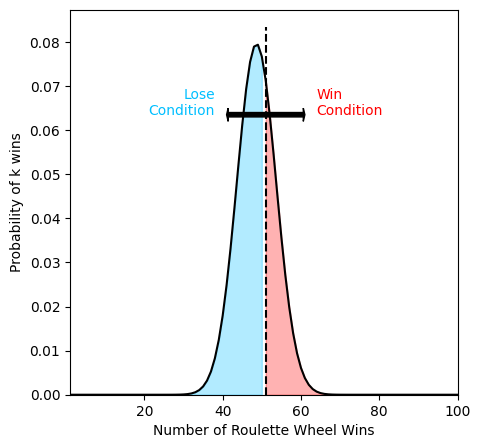

In [6]:
trials = 100
victory = int((trials / 2) + 1)
probabilities = binomial(num_trials=trials, probability=(18 / 37))
mean = trials * (18 / 37)

plt.figure(figsize=(5, 5))

plt.plot(range(1, trials + 1),
         probabilities,
         color='k')

# Vertical line at "victory"
plt.vlines(x=victory,
           ymin=0,
           ymax=max(probabilities) * 1.05,
           color='k',
           linestyle='--',
           linewidth=1.5)

# Shaded regions
plt.fill_between(range(1, victory),
                 probabilities[:victory - 1],
                 color='deepskyblue',
                 alpha=0.3)

plt.fill_between(range(victory, trials + 1),
                 probabilities[victory - 1:],
                 color='red',
                 alpha=0.3)

# Arrows (scaled to 20 trials)
plt.arrow(victory, max(probabilities) * 0.8,
          10, 0,
          width=0.001,
          length_includes_head=True,
          head_width=0.003,
          head_length=0.4,
          color='k')

plt.arrow(victory, max(probabilities) * 0.8,
          -10, 0,
          width=0.001,
          length_includes_head=True,
          head_width=0.003,
          head_length=0.4,
          color='k')

# Text labels (scaled)
plt.text(victory + 13,
         max(probabilities) * 0.80,
         "Win\nCondition",
         color='r',
         ha='left')

plt.text(victory - 13,
         max(probabilities) * 0.80,
         "Lose\nCondition",
         color='deepskyblue',
         ha='right')

plt.xlabel("Number of Roulette Wheel Wins")
plt.ylabel("Probability of k wins")
plt.xlim(1, trials)
plt.ylim(0, max(probabilities) * 1.1)

plt.show()

In this instance, the mode of the distribution is 48. Three wins below our victory condition. Let us see the case where we play 1000 games:

485


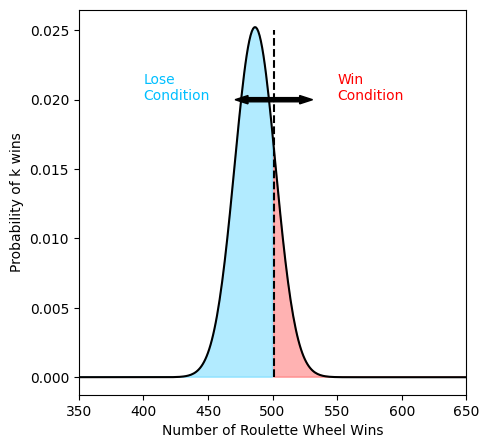

In [9]:
trials = 1000
victory = int((trials / 2) + 1)
probabilities = binomial(num_trials=trials, probability=(18 / 37))
mean = trials * (18 / 37)
import numpy as np
print(np.argmax(probabilities))

plt.figure(figsize=(5, 5))

plt.plot(range(1, trials + 1),
         probabilities,
         color='k')

plt.xlim(350, 650)
plt.vlines(x=victory, ymin=0, ymax=0.025, color='k', linestyle='--', linewidth=1.5)

# Filling the win/loss regions.
plt.fill_between(range(1, victory),
                 probabilities[0:victory - 1],
                 color='deepskyblue', alpha=0.3)

plt.fill_between(range(victory, trials + 1),
                 probabilities[victory - 1:trials],
                 color='red', alpha=0.3)

# Drawing arrows
plt.arrow(victory, 0.020, 30, 0,
          width=0.0003,
          length_includes_head=True,
          head_width=0.0006,
          head_length=10,
          color='k')

plt.arrow(victory, 0.020, -30, 0,
          width=0.0003,
          length_includes_head=True,
          head_width=0.0006,
          head_length=10,
          color='k')

# Text in *data* coordinates
plt.text(550, 0.020, "Win\nCondition", color='r')

# Text in *data* coordinates
plt.text(400, 0.020, "Lose\nCondition", color='deepskyblue')

plt.xlabel("Number of Roulette Wheel Wins")
plt.ylabel("Probability of k wins")
plt.show()

Note the change in x-axis bounds. The mode of this distribution is 485 victories - proportionally higher, at 48.5%, and very close to the success probability defined by roulette ($p = \tfrac{18}{37} \approx 48.6\%$). Yet this remains 16 successes short of our break-even condition. The key takeaways are:

- For binomial trials, the mode divided by the total number of trials converges towards the true probability of success as the number of experiments increases.

- In repeated roulette play, you are more likely to lose than to win. Most of the distribution’s probability mass lies in the region where more losses occur.


---
## Conditional Probabilities & Bayes' Theorem

In many physical problems, events are not independent. More often than not, the probability of one event can depend on whether another has occurred. The framework in which we describe dependent events is called "conditional probability".


If we have two events, A and B, the probability of A *given* that B has occurred is written:

$$
P(A\, |\, B) = \frac{P(A \cap B)}{P(B)}
\tag{2.21}
$$

provided $P(B) \neq 0$.
Here, $P(A \cap B)$ means the probability that *both* A and B occur.

When events are independent, the occurrence of B does not affect A, so

$$
P(A\, |\, B) = P(A)
\tag{2.22}
$$

and equivalently $P(A \cap B) = P(A)P(B)$.


### Bayes’ theorem
Rearranging the definition of conditional probability gives an extremely useful result known as **Bayes’ theorem**:

$$
P(A\, |\, B) = \frac{P(B\, |\, A)\, P(A)}{P(B)}
\tag{2.23}
$$

This allows us to update our belief about A after observing B.
In other words, it connects the **prior** probability $P(A)$ with the **posterior** probability $P(A|B)$.

```{admonition} Example: medical testing
:class: example

A common example used to understand Bayes' theorem is testing for disease. Suppose a disease affects 1% of a population.
A test correctly identifies it 99% of the time, but also gives a 5% false-positive rate. In other words, if a person has the disease, the test will return a positive result 99% of the time, and a negative result 1% of the time. Meanwhile, if the person does not have the disease, it will return a negative result 95% of the time, and a positive result 5% of the time.

Let A = “person has disease” and B = “test is positive”. Here we also use $\bar{A}$ to denote no disease.
Then:

- $P(A) = 0.01$
- $P(B|A) = 0.99$
- $P(B|\bar{A}) = 0. 05$

The overall probability of obtaining a positive test result must factor in both means of obtaining that result:

$$
P(B) = P(B|A)P(A) + P(B|\bar{A})P(\bar{A})
 = 0. 99(0. 01) + 0. 05(0. 99) = 0. 0594
$$

Applying Bayes’ theorem:

$$
P(A|B) = \frac{P(B|A)P(A)}{P(B)} = \frac{0. 99 \times 0. 01}{0. 0594} \approx 0. 17
$$

So even with a positive result, there’s only a 17% chance the person actually has the disease.

This illustrates how rare events can strongly influence conditional probabilities. Follow-up testing can help in reducing the uncertainty of a result, by tightening the variance over repeated trials. That is to say, the probability of obtaining several positive test results in a row, given that the person does not have the disease, is astoundingly small, (and is likely indicative that the person does in fact have the disease.)
```

```{admonition} Example: The Monty Hall Problem
:class: example

The Monty Hall problem is a very famous thought experiment in probability, named after the host, Monty Hall, of the 1970s American television game show *Let’s Make a Deal*. It serves as a canonical example of conditional probability, highlighting how new information can reshape the landscape of a problem even when the underlying setup appears symmetric. The problem is posed as follows: you are on a game show where three doors are presented before you; behind one of these doors is a prize (cash, a car, etc.), whereas behind the other two is a goat. Your objective is to win the prize.

You pick a door. Before revealing the outcome of your choice, the host -who knows where the prize is - opens one of the remaining doors to reveal a goat. Crucially, the host will never reveal the prize, or the door that you have picked. You are then offered a choice: stick with your original door, or switch to the remaining unopened one. The puzzle is in determining which is, on average, the more viable strategy. Does switching enhance your odds of winning, or does it make no difference at all? Stop to consider your intuition, and think about what information you are being supplied with as you are making this decision.

Let us review the rules of the game:
- There are three doors; behind one is a prize, the other two hide goats.
- You pick a door randomly.
- Before revealing the outcome of your choice, the host opens one of the other doors to reveal a goat.
- You are then offered to either remain with your initial choice, or to switch to the remaining unopened door.

Let:
- $H_i$ denote "the prize is behind door $i$", where $i \in \{1, 2, 3 \}$.
- $M_i$ denote "the host opens foor $i$ and reveals a goat".

Before anything happens, the prize is equally likely to be behind any of the doors:

$$
P(H_1) = P(H_2) = P(H_3) = \frac{1}{3}
$$

So if you remain steadfast in your decision, you have a $1/3$ chance of winning. However, the behaviour of the host matters. After they open the door, the problem goes from a generic, random choice to a filtered, curated choice. To see this more clearly, imagine a variant of the original game:
- There are 100 doors to pick from in the beginning.
- You pick one door.
- The host looks at the remaining 99, finds the goats, and opens all but one of them.
- You are again left with a choice between two unopened doors.

Initially, the door you picked carries a $1/100$ chance of hiding the prize, whereas the remaining 99 doors colelctively carry a $99/100$ chance. The host's action of opening 98 goat doors does not re-randomise the scenario, but effectively concentrates the entire $99/100$ probability mass of "one of the other doors" onto the single remaining unopened door. In this exaggerated scenario, it is intuitively clear that you should pick the door that remained after the host's action. The three-door scenario case employs exactly the same logic...

Let us now view this problem through the lens of Bayes' Theorem. We have our prior probabilities $P(H_1) = P(H_2) = P(H_3) = \frac{1}{3}$. Let us say that initially you pick door number 1. Remember that the host has a fixed set of rules:
- They never open your chosen door.
- They never open the door which hides the prize.
- If both of the remaining doors hide goats, they choose the door to open randomly.

Now suppose that after choosing door 1, the host opens door 2 to reveal a goat. We now wish to compare:
- $P(H_1 | M_2)$ - The probability that the prize is behind the original door.
- $P(H_3 | M_2)$ - The probability that the prize is behind the other unopened door.

The conditional probabilities on the host's actions are:

- If $H_1$ is true, both doors 2 and 3 hide goats, so the host chooses between the two of them randomly.

$$
P(M_2 | H_1) = \frac{1}{2}
$$

- If $H_2$ is true, then the host cannot open door 2, so they must open door 3.

$$
P(M_2 | H_2) = 0
$$

- If $H_3$ is true, then the host must choose door 2 as the player has originally selected door 1.

$$
P(M_2 | H_3) = 1
$$

From this information, we can calculate the probability of the prize being behind one of the two remaining doors with Bayes' Theorem.

$$
P(H_1 | M_2) = \frac{P(M_2 | H_1)P(H_1)}{P(M_2)} = \frac{P(M_2 | H_1)P(H_1)}{P(M_2 | H_1)P(H_1) + P(M_2 | H_2)P(H_2) + P(M_2 | H_3)P(H_3)}.
$$

We have all the necessary quantities to compute this probability:

$$
P(H_1 \mid M_2)
= \frac{\tfrac{1}{2}\cdot\tfrac{1}{3}}
       {\tfrac{1}{2}\cdot\tfrac{1}{3} + 0\cdot\tfrac{1}{3} + 1\cdot\tfrac{1}{3}}
= \frac{\tfrac{1}{6}}{\tfrac{1}{2}}
= \frac{1}{3}.
$$

Similarly,

$$
P(H_3 | M_2) = \frac{P(M_2 | H_3)P(H_3)}{P(M_2)} = \frac{P(M_2 | H_1)P(H_1)}{P(M_2 | H_1)P(H_1) + P(M_2 | H_2)P(H_2) + P(M_2 | H_3)P(H_3)} = \frac{1 \cdot \tfrac{1}{3}}{\tfrac{1}{2}} = \frac{2}{3}.
$$

Therefore, after the host opens door 2 and reveals a goat, your original door still only has probability $\tfrac{1}{3}$ of hiding the prize, while the other unopened door now carries probability $\tfrac{2}{3}$. The optimal strategy is to switch doors.
```